In [26]:
import glob
import os

import numpy as np
import scanpy 
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import anndata

anndata.__version__

scanpy.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
scanpy.logging.print_versions()

scanpy==1.4.6.dev9+ge632939 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.3.2 pandas==0.25.3 scikit-learn==0.22 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


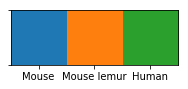

In [2]:
SPECIES_ORDER = ['Mouse', 'Mouse lemur', 'Human']
N_SPECIES = len(SPECIES_ORDER)
SPECIES_PALETTE = sns.color_palette(n_colors=N_SPECIES)
sns.palplot(SPECIES_PALETTE)

ax = plt.gca()
ax.set(xticklabels=SPECIES_ORDER, xticks=np.arange(N_SPECIES));

## Make softlink folder

In [11]:
softlink_folder = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/rawdata/tenx/lung-soft-links/'
! mkdir -p $softlink_folder

# Load data

In [3]:
folder = '/home/olga/googledrive/TabulaMicrocebus/data/cross-species'
! ls -lha $folder

total 24G
drwxrwxr-x 1 olga olga  4.0K Feb 13 11:27 .
drwxrwxr-x 1 olga olga  4.0K Dec  2 21:43 ..
drwxrwxr-x 1 olga olga  4.0K Mar 21 21:55 alltissues__10x__lemur__one2one_orthologs__csvs
-rw-r--r-- 1 olga olga  2.8G Mar 22 15:49 alltissues__10x__lemur__one2one_orthologs.h5ad
drwxrwxr-x 1 olga olga  4.0K Mar 21 16:51 alltissues__10x__mouse__one2one_orthologs__csvs
-rw-r--r-- 1 olga olga  3.1G Mar 22 15:42 alltissues__10x__mouse__one2one_orthologs.h5ad
-rw-r--r-- 1 olga olga  1.4G Mar 22 15:08 concatenated__human-lung--lemur-alltissues--mouse-alltissues__10x__one2one_orthologs.h5ad
drwxrwxr-x 1 olga olga  4.0K Mar 22 15:40 concatenated__human-lung--lemur-lung--mouse-lung__10x__one2one_orthologs
-rw-r--r-- 1 olga olga  1.4G Mar 22 15:39 concatenated__human-lung--lemur-lung--mouse-lung__10x__one2one_orthologs.h5ad
drwxrwxr-x 1 olga olga  4.0K Mar 22 15:40 concatenated__human-lung--lemur-lung--mouse-lung__10x__one2one_orthologs__unified_compartments
drwxrwxr-x 1 olga olga  4.0K Mar 29 18:

In [4]:
%%time
h5ad = f'{folder}/concatenated__human-lung--lemur-lung--mouse-lung__10x__one2one_orthologs__unified_compartments__bbknn.h5ad'
adata = scanpy.read_h5ad(h5ad)
adata

CPU times: user 1.42 s, sys: 13min 51s, total: 13min 53s
Wall time: 15min 58s


AnnData object with n_obs × n_vars = 72134 × 13340 
    obs: 'age', 'batch', 'cell', 'cell_ontology_class', 'cell_ontology_id', 'channel', 'channel_no_10x', 'compartment', 'compartment_id', 'free_annotation', 'individual', 'location', 'magnetic.selection', 'method', 'mouse.id', 'nGene', 'nUMI', 'n_counts', 'n_genes', 'orig.ident', 'original_channel', 'patient', 'percent.ribo', 'preparation.site', 'region', 'sample', 'sequencing_run', 'sex', 'species', 'species_batch', 'species_latin', 'subtissue', 'tissue', 'tissue_free_annotation', 'compartment_updated_from_human', 'compartment_updated_from_human__with_species', 'compartment_updated_from_lemur', 'compartment_updated_from_lemur__with_species', 'narrow_group', 'broad_group', 'compartment_group', 'log_counts', 'sqrt_counts'
    var: 'mouse_lemur__gene_name', 'mouse__gene_name', 'gene_ids-lemur', 'n_cells-mouse', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'age_colors', 'cell_ontology_class_colors', '

In [6]:
# %%time
# h5ad = f'{folder}/concatenated__human-lung--lemur-lung--mouse-lung__10x__one2one_orthologs.h5ad'
# adata = scanpy.read_h5ad(h5ad)
# adata

In [8]:
adata.obs.species_batch.value_counts()

lemur    104167
human     60993
mouse     24540
Name: species_batch, dtype: int64

In [9]:
adata.var.head()


,mouse_lemur__gene_name,mouse__gene_name,gene_ids-lemur,n_cells-mouse
SAMD11,SAMD11,Samd11,gene2117,5381
NOC2L,NOC2L,Noc2l,gene2116,48156
KLHL17,KLHL17,Klhl17,gene2115,11262
PLEKHN1,PLEKHN1,Plekhn1,gene2114,10242
ISG15,ISG15,Isg15,gene2111,74269


# Human channels

## get channels from adata.obs

In [29]:
human_normal_lung_channels = sorted(adata.obs.query('species_batch == "human"')['channel'].unique())
human_normal_lung_channels

['P1_2',
 'P1_3',
 'P1_4',
 'P2_1',
 'P2_2',
 'P2_3',
 'P2_4',
 'P2_5',
 'P2_6',
 'P2_7',
 'P2_8',
 'P3_2',
 'P3_3',
 'P3_4',
 'P3_5',
 'P3_6',
 'P3_7']

## Get base directory

In [12]:
human_base = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stanford_sherlock/oak/stanford/groups/krasnow/ktrav/HLCA/data10x/sequencing_runs/sequencing_runs/'

In [19]:
ls -lha $human_base/*/alignments/

/home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stanford_sherlock/oak/stanford/groups/krasnow/ktrav/HLCA/data10x/sequencing_runs/sequencing_runs//171205_A00111_0088_BH55NYDMXX/alignments/:
total 4.5K
drwxrwsrwx 9 olga olga 4.0K Aug 25  2019 ./
drwxrwsrwx 3 olga olga 4.0K Aug 25  2019 ../
drwxrwsrwx 2 olga olga 4.0K Aug 25  2019 P1_1/
drwxrwsrwx 2 olga olga 4.0K Aug 25  2019 P1_2/
drwxrwsrwx 3 olga olga 4.0K Aug 25  2019 P1_3/
drwxrwsrwx 2 olga olga 4.0K Aug 25  2019 P1_4/
drwxrwsrwx 2 olga olga 4.0K Aug 25  2019 P1_5/
drwxrwsrwx 2 olga olga 4.0K Aug 26  2019 P1_6/
drwxrwsrwx 2 olga olga 4.0K Aug 26  2019 P1_7/

/home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stanford_sherlock/oak/stanford/groups/krasnow/ktrav/HLCA/data10x/sequencing_runs/sequencing_runs//180607_A00111_0155_BHFCWYDMXX/alignments/:
total 9.0K
drwxrwsrwx 18 olga olga 4.0K Aug 25  2019 ./
drwxrwsrwx  3 olga olga 4.0K Aug 25  2019 ../
drwxrwsrwx  2 olga olga 4.0K Aug 25  2019 P2_1/
drwxrwsrwx  2 olga olga 4.0K

## Glob directory to get channel folders

In [27]:
human_channel_folders = glob.glob(f'{human_base}/*/alignments/*')
human_channel_folders

['/home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stanford_sherlock/oak/stanford/groups/krasnow/ktrav/HLCA/data10x/sequencing_runs/sequencing_runs/180607_A00111_0155_BHFCWYDMXX/alignments/P3_5',
 '/home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stanford_sherlock/oak/stanford/groups/krasnow/ktrav/HLCA/data10x/sequencing_runs/sequencing_runs/180607_A00111_0155_BHFCWYDMXX/alignments/P3_6',
 '/home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stanford_sherlock/oak/stanford/groups/krasnow/ktrav/HLCA/data10x/sequencing_runs/sequencing_runs/180607_A00111_0155_BHFCWYDMXX/alignments/P3_7',
 '/home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stanford_sherlock/oak/stanford/groups/krasnow/ktrav/HLCA/data10x/sequencing_runs/sequencing_runs/180607_A00111_0155_BHFCWYDMXX/alignments/P3_8',
 '/home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stanford_sherlock/oak/stanford/groups/krasnow/ktrav/HLCA/data10x/sequencing_runs/sequencing_runs/180607_A00111_0155_BHFCWYDMXX/alignmen

In [33]:
human_folders = pd.Series(human_channel_folders, index=map(os.path.basename, human_channel_folders))
print(human_folders.shape)
human_folders

(23,)


P3_5    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P3_6    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P3_7    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P3_8    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P3_1    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P3_2    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P3_3    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_5    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P3_4    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_6    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_7    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_8    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_1    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_2    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_3  

In [32]:
len(human_normal_lung_channels)

17

In [31]:
human_normal_lung_folders = human_folders[human_normal_lung_channels]
print(human_normal_lung_folders.shape)
human_normal_lung_folders

(17,)


P1_2    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P1_3    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P1_4    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_1    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_2    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_3    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_4    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_5    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_6    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_7    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P2_8    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P3_2    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P3_3    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P3_4    /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stan...
P3_5  

## Soft link human channel folders

### Make softlink folder for human

In [35]:
human_softlink_folder = f'{softlink_folder}/human'
! mkdir -p $human_softlink_folder

In [38]:
print(human_softlink_folder)

/home/olga/data_lg/data_sm_copy/tabula-microcebus/rawdata/tenx/lung-soft-links//human


In [36]:
for channel, f in human_normal_lung_folders.items():
    ! ln -s $f $human_softlink_folder/$channel

In [37]:
ls -lha $human_softlink_folder

total 9.5K
drwxrwxr-x 2 olga olga 4.0K Apr 10 16:10 ./
drwxrwxr-x 3 olga olga 4.0K Apr 10 16:09 ../
lrwxrwxrwx 1 olga olga  184 Apr 10 16:10 P1_2 -> /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stanford_sherlock/oak/stanford/groups/krasnow/ktrav/HLCA/data10x/sequencing_runs/sequencing_runs/171205_A00111_0088_BH55NYDMXX/alignments/P1_2/
lrwxrwxrwx 1 olga olga  184 Apr 10 16:10 P1_3 -> /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stanford_sherlock/oak/stanford/groups/krasnow/ktrav/HLCA/data10x/sequencing_runs/sequencing_runs/171205_A00111_0088_BH55NYDMXX/alignments/P1_3/
lrwxrwxrwx 1 olga olga  184 Apr 10 16:10 P1_4 -> /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stanford_sherlock/oak/stanford/groups/krasnow/ktrav/HLCA/data10x/sequencing_runs/sequencing_runs/171205_A00111_0088_BH55NYDMXX/alignments/P1_4/
lrwxrwxrwx 1 olga olga  184 Apr 10 16:10 P2_1 -> /home/olga/data_lg/data_sm_copy/tabula-microcebus/from_stanford_sherlock/oak/stanford/groups/krasnow/ktrav/

# Lemur channels

In [54]:
lemur_obs = adata.obs.query('species_batch == "lemur"')
lemur_obs['channel'].value_counts()

Antoine_Lung_CD31_10X     4921
Antoine_Lung_P3_10X       2927
Bernard_Lung_10X          2830
Antoine_Lung_EPCAM_10X    2016
Stumpy_Lung_10X           1992
Martine_Lung_2_10X        1506
Martine_Lung_1_10X        1483
P3_3                         0
P1_4                         0
P3_6                         0
P3_5                         0
P3_4                         0
P1_2                         0
P1_3                         0
P2_1                         0
P3_2                         0
P2_2                         0
P3_7                         0
P2_4                         0
P2_5                         0
P2_6                         0
P2_7                         0
P2_8                         0
P2_3                         0
Name: channel, dtype: int64

In [59]:
lemur_obs.head()

,age,batch,cell,cell_ontology_class,cell_ontology_id,channel,channel_no_10x,compartment,compartment_id,free_annotation,...,tissue_free_annotation,compartment_updated_from_human,compartment_updated_from_human__with_species,compartment_updated_from_lemur,compartment_updated_from_lemur__with_species,narrow_group,broad_group,compartment_group,log_counts,sqrt_counts
Antoine_Lung_CD31_10X_AAACCTGAGAAACGAG-lemur,NaN,individual=Antoine__tissue=Lung__old_channel=A...,NaN,macrophage,CL:0000235,Antoine_Lung_CD31_10X,ANTOINE_LUNG_CD3,myeloid,CL:0000766,macrophages (MARCO+ SDC2+),...,NaN,myeloid,myeloid (Mouse lemur),myeloid,myeloid (Mouse lemur),Macrophage,Macrophage,myeloid,9.044759,92.054329
Antoine_Lung_CD31_10X_AAACCTGAGATGTTAG-lemur,NaN,individual=Antoine__tissue=Lung__old_channel=A...,NaN,NaN,NaN,Antoine_Lung_CD31_10X,ANTOINE_LUNG_CD3,NaN,NaN,doublets_lymphoid_myeloid,...,NaN,nan,nan (Mouse lemur),nan,nan (Mouse lemur),Doublet,Doublet,nan,8.361942,65.429352
Antoine_Lung_CD31_10X_AAACCTGAGGCAGTCA-lemur,NaN,individual=Antoine__tissue=Lung__old_channel=A...,NaN,type II pneumocyte,CL:0002063,Antoine_Lung_CD31_10X,ANTOINE_LUNG_CD3,epithelial,UBERON:0000483,alveolar epithelial cells (type 2),...,NaN,epithelial,epithelial (Mouse lemur),epithelial,epithelial (Mouse lemur),Alveolar Epithelial Type 2,Alveolar Epithelial Type 2,epithelial,9.181324,98.559624
Antoine_Lung_CD31_10X_AAACCTGAGGGTGTGT-lemur,NaN,individual=Antoine__tissue=Lung__old_channel=A...,NaN,macrophage,CL:0000235,Antoine_Lung_CD31_10X,ANTOINE_LUNG_CD3,myeloid,CL:0000766,macrophages (MARCO+ MKI67+),...,NaN,myeloid,myeloid (Mouse lemur),myeloid,myeloid (Mouse lemur),Proliferating Macrophage,Macrophage,myeloid,9.233374,101.158295
Antoine_Lung_CD31_10X_AAACCTGCACCACCAG-lemur,NaN,individual=Antoine__tissue=Lung__old_channel=A...,NaN,myeloid cell,CL:0000763,Antoine_Lung_CD31_10X,ANTOINE_LUNG_CD3,myeloid,CL:0000766,unknown_Lung_myeloid_group1 (S100A8- S100A10+),...,NaN,myeloid,myeloid (Mouse lemur),myeloid,myeloid (Mouse lemur),Unknown Myeloid,Unknown Myeloid,myeloid,7.738052,47.895721


In [56]:
lemur_obs.groupby(['individual', 'sequencing_run', 'channel']).size()

individual  sequencing_run                 channel               
Antoine     180917_A00111_0211_AHGKCVDMXX  Antoine_Lung_P3_10X       2927
            180917_A00111_0212_BHGMF5DMXX  Antoine_Lung_CD31_10X     4921
                                           Antoine_Lung_EPCAM_10X    2016
Bernard     170727_A00111_0043_AH252WDMXX  Bernard_Lung_10X          2830
Martine     180817_A00111_0192_BHFVL5DMXX  Martine_Lung_1_10X        1483
                                           Martine_Lung_2_10X        1506
Stumpy      170919_A00111_0061_BH3FYJDMXX  Stumpy_Lung_10X           1992
dtype: int64

In [80]:
lemur_obs.groupby(['individual', 'sequencing_run', 'channel', 'batch']).size()

individual  sequencing_run                 channel                 batch                                                             
Antoine     180917_A00111_0211_AHGKCVDMXX  Antoine_Lung_P3_10X     individual=Antoine__tissue=Lung__old_channel=Antoine_Lung_P3          2927
            180917_A00111_0212_BHGMF5DMXX  Antoine_Lung_CD31_10X   individual=Antoine__tissue=Lung__old_channel=Antoine_Lung_CD31pos     4921
                                           Antoine_Lung_EPCAM_10X  individual=Antoine__tissue=Lung__old_channel=Antoine_Lung_EPCAMpos    2016
Bernard     170727_A00111_0043_AH252WDMXX  Bernard_Lung_10X        individual=Bernard__tissue=Lung__old_channel=Bernard_Lung_10X         2830
Martine     180817_A00111_0192_BHFVL5DMXX  Martine_Lung_1_10X      individual=Martine__tissue=Lung__old_channel=Martine_Lung_1           1483
                                           Martine_Lung_2_10X      individual=Martine__tissue=Lung__old_channel=Martine_Lung_2           1506
Stumpy      17

In [ ]:
lemur_obs.groupby(['individual', 'sequencing_run', 'channel_']).size()

In [53]:
lemur_tenx_folder = '/mnt/data_lg/data_sm_copy/olga/tabula-microcebus/rawdata/aligned/'
! ls -lha $lemur_tenx_folder

total 3.5K
drwxrwxr-x  7 nobody 4294967294 4.0K Dec 31  1969 .
drwxrwxrwx 13 nobody 4294967294 4.0K Apr 10 15:20 ..
drwxrwxr-x 13 nobody 4294967294 4.0K Feb 14 13:55 antoine__180917_A00111_0211_AHGKCVDMXX
drwxrwxr-x 14 nobody 4294967294 4.0K Dec 31  1969 antoine__180917_A00111_0212_BHGMF5DMXX
drwxrwxr-x  2 root   root       4.0K Dec 15 00:52 .aws-datasync
drwxrwxr-x 14 nobody 4294967294 4.0K Dec 31  1969 martine__180817_A00111_0192_BHFVL5DMXX
drwxrwxr-x  3 olga   olga       4.0K Oct 22 06:29 micmur3


In [68]:
! ls -lha $lemur_tenx_folder/*

/mnt/data_lg/data_sm_copy/olga/tabula-microcebus/rawdata/aligned//antoine__180917_A00111_0211_AHGKCVDMXX:
total 6.5K
drwxrwxr-x 13 nobody 4294967294 4.0K Feb 14 13:55 .
drwxrwxr-x  7 nobody 4294967294 4.0K Dec 31  1969 ..
drwxrwxr-x  3 nobody 4294967294 4.0K Feb 14 13:54 ANTOINE_COLON_LARGEPROXIMAL_RESULTS
drwxrwxr-x  3 nobody 4294967294 4.0K Feb 14 13:58 ANTOINE_FAT_COMBINED_RESULTS
drwxrwxr-x  3 nobody 4294967294 4.0K Feb 14 14:06 ANTOINE_HEART_RESULTS
drwxrwxr-x  3 nobody 4294967294 4.0K Feb 14 14:13 ANTOINE_KIDNEY_RESULTS
drwxrwxr-x  3 nobody 4294967294 4.0K Feb 14 14:21 ANTOINE_LIMB_BONE_RESULTS
drwxrwxr-x  3 nobody 4294967294 4.0K Feb 14 14:30 ANTOINE_LIVER_RESULTS
drwxrwxr-x  3 nobody czb        4.0K Feb  4 16:49 ANTOINE_LUNG_P3_RESULTS
drwxrwxr-x  3 nobody 4294967294 4.0K Feb 14 14:42 ANTOINE_RETINA_RESULTS
drwxrwxr-x  3 nobody 4294967294 4.0K Feb 14 14:52 ANTOINE_SKIN_RESULTS
drwxrwxr-x  3 nobody 4294967294 4.0K Feb 14 15:01 ANTOINE_SMALLINTESTINE_COMBINED_RESULTS
drwxrwxr-x  

## Make lemur softlink folder

In [62]:
lemur_softlink_folder = f"{softlink_folder}lemur"
! mkdir -p $lemur_softlink_folder

In [75]:
ls -lha $lemur_softlink_folder

total 2.5K
drwxrwxr-x 2 olga olga 4.0K Apr 10 17:07 ./
drwxrwxr-x 5 olga olga 4.0K Apr 10 16:28 ../
lrwxrwxrwx 1 olga olga  114 Apr 10 16:32 ANTOINE_LUNG_P3_RESULTS -> /mnt/data_lg/data_sm_copy/olga/tabula-microcebus/rawdata/aligned/antoine__180917_A00111_0211_AHGKCVDMXX/ANTOINE_LUNG_P3_RESULTS/
lrwxrwxrwx 1 olga olga  113 Apr 10 16:32 MARTINE_LUNG_1_RESULTS -> /mnt/data_lg/data_sm_copy/olga/tabula-microcebus/rawdata/aligned/martine__180817_A00111_0192_BHFVL5DMXX/MARTINE_LUNG_1_RESULTS/
lrwxrwxrwx 1 olga olga  113 Apr 10 16:32 MARTINE_LUNG_2_RESULTS -> /mnt/data_lg/data_sm_copy/olga/tabula-microcebus/rawdata/aligned/martine__180817_A00111_0192_BHFVL5DMXX/MARTINE_LUNG_2_RESULTS/


In [74]:
! unlink $lemur_softlink_folder/ANTOINE_LUNG_CD31_RESULTS
! unlink $lemur_softlink_folder/ANTOINE_LUNG_EPCAM_RESULTS
! unlink $lemur_softlink_folder/BERNARD_LUNG_RESULTS
! unlink $lemur_softlink_folder/STUMPY_LUNG_RESULTS


## Softlink lemur 10x channels to folder

In [78]:
for (individual, seq_run, channel), df in lemur_obs.groupby(['individual', 'sequencing_run', 'channel']):
    cleaned_channel = channel.split('_10X')[0].upper()
    if cleaned_channel.startswith("ANTOINE") and "EPCAM" or "CD31" in cleaned_channel:
        cleaned_channel += '_POS'
    
    channel_folder = cleaned_channel + "_RESULTS"
    original = f'{lemur_tenx_folder}{individual.lower()}__{seq_run}/{channel_folder}'
    if not os.path.exists(original):
        # No data, skip
        continue
    
    newplace = f'{lemur_softlink_folder}/{channel_folder}'
    
    if os.path.exists(newplace):
        # Already did the link, skip it
        continue

    
    print(f'\noriginal: {original}')
    print(f'newplace: {newplace}')
    ! ln -s $original $newplace

In [79]:
ls -lha $lemur_softlink_folder

total 3.5K
drwxrwxr-x 2 olga olga 4.0K Apr 10 17:09 ./
drwxrwxr-x 5 olga olga 4.0K Apr 10 16:28 ../
lrwxrwxrwx 1 olga olga  120 Apr 10 17:09 ANTOINE_LUNG_CD31_POS_RESULTS -> /mnt/data_lg/data_sm_copy/olga/tabula-microcebus/rawdata/aligned/antoine__180917_A00111_0212_BHGMF5DMXX/ANTOINE_LUNG_CD31_POS_RESULTS/
lrwxrwxrwx 1 olga olga  121 Apr 10 17:09 ANTOINE_LUNG_EPCAM_POS_RESULTS -> /mnt/data_lg/data_sm_copy/olga/tabula-microcebus/rawdata/aligned/antoine__180917_A00111_0212_BHGMF5DMXX/ANTOINE_LUNG_EPCAM_POS_RESULTS/
lrwxrwxrwx 1 olga olga  114 Apr 10 16:32 ANTOINE_LUNG_P3_RESULTS -> /mnt/data_lg/data_sm_copy/olga/tabula-microcebus/rawdata/aligned/antoine__180917_A00111_0211_AHGKCVDMXX/ANTOINE_LUNG_P3_RESULTS/
lrwxrwxrwx 1 olga olga  113 Apr 10 16:32 MARTINE_LUNG_1_RESULTS -> /mnt/data_lg/data_sm_copy/olga/tabula-microcebus/rawdata/aligned/martine__180817_A00111_0192_BHFVL5DMXX/MARTINE_LUNG_1_RESULTS/
lrwxrwxrwx 1 olga olga  113 Apr 10 16:32 MARTINE_LUNG_2_RESULTS -> /mnt/data_lg/data_sm_

In [66]:
ll /mnt/data_lg/data_sm_copy/olga/tabula-microcebus/rawdata/aligned/martine__180817_A00111_0192_BHFVL5DMXX/MARTINE_LUNG_1_RESULTS

total 17069657
-rwxrwxr-x 1 nobody    14008320 Dec 31  1969 barcodes.tsv*
-rwxrwxr-x 1 nobody      612531 Dec 31  1969 genes.tsv*
drwxr-xr-x 3 root          4096 Feb 15 11:14 MARTINE_LUNG_1/
-rwxrwxr-x 1 nobody 17283970491 Dec 31  1969 MARTINE_LUNG_1.tgz*
-rwxrwxr-x 1 nobody   156565178 Dec 31  1969 matrix.mtx*
-rwxrwxr-x 1 nobody         686 Dec 31  1969 metrics_summary.csv*
-rwxrwxr-x 1 nobody    21485441 Dec 31  1969 raw_gene_bc_matrices_h5.h5*
-rwxrwxr-x 1 nobody     2672048 Dec 31  1969 web_summary.html*


# Mouse channels

In [8]:
mouse = adata.obs.query('species_batch == "mouse"')
mouse.head()

,age,batch,cell,cell_ontology_class,cell_ontology_id,channel,channel_no_10x,compartment,compartment_id,free_annotation,...,tissue_free_annotation,compartment_updated_from_human,compartment_updated_from_human__with_species,compartment_updated_from_lemur,compartment_updated_from_lemur__with_species,narrow_group,broad_group,compartment_group,log_counts,sqrt_counts
AAACGGGTCGCCCTTA-1-11-0-0-mouse,18m,NaN,MACA_18m_F_LUNG_50_AAACGGGTCGCCCTTA,B cell,NaN,NaN,NaN,NaN,NaN,B,...,Lung,lymphoid,lymphoid (Mouse),lymphoid,lymphoid (Mouse),B cell,B cell,lymphoid,8.382519,66.105972
AAAGATGAGCAGACTG-1-11-0-0-mouse,18m,NaN,MACA_18m_F_LUNG_50_AAAGATGAGCAGACTG,non-classical monocyte,NaN,NaN,NaN,NaN,NaN,Nonclassical Monocyte,...,Lung,immune,immune (Mouse),myeloid,myeloid (Mouse),Monocyte,Monocyte,myeloid,7.906916,52.115257
AAAGATGAGCCGTCGT-1-11-0-0-mouse,18m,NaN,MACA_18m_F_LUNG_50_AAAGATGAGCCGTCGT,NK cell,NaN,NaN,NaN,NaN,NaN,Natural Killer,...,Lung,immune,immune (Mouse),lymphoid,lymphoid (Mouse),Natural Killer,Natural Killer,lymphoid,7.988882,54.295486
AAAGCAACATGGTAGG-1-11-0-0-mouse,18m,NaN,MACA_18m_F_LUNG_50_AAAGCAACATGGTAGG,alveolar macrophage,NaN,NaN,NaN,NaN,NaN,Alveolar Macrophage,...,Lung,immune,immune (Mouse),myeloid,myeloid (Mouse),Macrophage,Macrophage,myeloid,9.189219,98.949486
AAATGCCCACCAGGTC-1-11-0-0-mouse,18m,NaN,MACA_18m_F_LUNG_50_AAATGCCCACCAGGTC,NK cell,NaN,NaN,NaN,NaN,NaN,Natural Killer,...,Lung,immune,immune (Mouse),lymphoid,lymphoid (Mouse),Natural Killer,Natural Killer,lymphoid,8.239065,61.530479


In [9]:
def make_mouse_channel(x):
    split = x.split('_')
    channel = '_'.join(split[:-1])
    return channel

mouse['channel'] = mouse['cell'].map(make_mouse_channel)

/home/olga/miniconda3/envs/tabula-microcebus-v2/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
mouse['channel'].value_counts()

10X_P1_6              3460
10X_P8_13             1436
MACA_21m_F_LUNG_55    1287
10X_P1_14             1284
MACA_18m_M_LUNG_52    1222
10X_P5_14             1212
MACA_21m_F_LUNG_54    1090
MACA_18m_M_LUNG_53    1019
MACA_18m_F_LUNG_51     919
10X_P5_13              914
10X_P2_5               822
10X_P7_9               812
10X_P8_12              534
10X_P3_0               413
10X_P7_8               339
MACA_18m_F_LUNG_50     273
Name: channel, dtype: int64

In [42]:
mouse.groupby(['age', 'channel']).size()

age  channel           
1m   10X_P5_13              914
     10X_P5_14             1212
3m   10X_P7_8               339
     10X_P7_9               812
     10X_P8_12              534
     10X_P8_13             1436
18m  MACA_18m_F_LUNG_50     273
     MACA_18m_F_LUNG_51     919
     MACA_18m_M_LUNG_52    1222
     MACA_18m_M_LUNG_53    1019
21m  MACA_21m_F_LUNG_54    1090
     MACA_21m_F_LUNG_55    1287
30m  10X_P1_14             1284
     10X_P1_6              3460
     10X_P2_5               822
     10X_P3_0               413
dtype: int64

In [44]:
mouse['age_folder'] = mouse['age'].str.replace('m', '_month')
mouse['age_folder'].value_counts()

/home/olga/miniconda3/envs/tabula-microcebus-v2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


30_month    5979
18_month    3433
3_month     3121
21_month    2377
1_month     2126
Name: age_folder, dtype: int64

## Get tabula muris 10x folders

In [39]:
mouse_data_folder = '/home/olga/data_lg/tabula-muris-senis/10x/'

In [40]:
ls -lha $mouse_data_folder

total 4.0K
drwxrwxr-x  8 olga czb   4.0K Mar 23 02:46 ./
drwxrwxr-x  6 olga 21002 4.0K Mar 22 08:03 ../
drwxrwxr-x 50 olga czb   4.0K Mar 22 10:15 18_month/
drwxrwxr-x 18 olga czb   4.0K Mar 22 12:03 1_month/
drwxrwxr-x 26 olga czb   4.0K Mar 22 13:44 21_month/
drwxrwxr-x 42 olga czb   4.0K Mar 22 23:04 24_month/
drwxr-xr-x 47 5008 czb   4.0K Mar 23 02:43 30_month/
drwxr-xr-x 30 5008 czb   4.0K Mar 23 05:02 3_month/


In [43]:
ls -lha $mouse_data_folder/*

/home/olga/data_lg/tabula-muris-senis/10x//18_month:
total 25K
drwxrwxr-x 50 olga czb 4.0K Mar 22 10:15 ./
drwxrwxr-x  8 olga czb 4.0K Mar 23 02:46 ../
drwxrwxr-x  2 olga czb 4.0K Mar 22 08:27 MACA_18m_F_AORTA_50/
drwxrwxr-x  2 olga czb 4.0K Mar 22 08:26 MACA_18m_F_BM_50/
drwxrwxr-x  2 olga czb 4.0K Mar 22 08:28 MACA_18m_F_BM_51/
drwxrwxr-x  2 olga czb 4.0K Mar 22 08:25 MACA_18m_F_BREAST_50/
drwxrwxr-x  2 olga czb 4.0K Mar 22 08:26 MACA_18m_F_BREAST_51/
drwxrwxr-x  2 olga czb 4.0K Mar 22 08:43 MACA_18m_F_GAT_50/
drwxrwxr-x  2 olga czb 4.0K Mar 22 08:52 MACA_18m_F_KIDNEY_50/
drwxrwxr-x  2 olga czb 4.0K Mar 22 08:53 MACA_18m_F_KIDNEY_51/
drwxrwxr-x  2 olga czb 4.0K Mar 22 08:50 MACA_18m_F_LIVER_HEPATOCYTES_51/
drwxrwxr-x  2 olga czb 4.0K Mar 22 08:54 MACA_18m_F_LIVER_NPC_51/
drwxrwxr-x  2 olga czb 4.0K Mar 22 09:04 MACA_18m_F_LUNG_50/
drwxrwxr-x  2 olga czb 4.0K Mar 22 09:12 MACA_18m_F_LUNG_51/
drwxrwxr-x  2 olga czb 4.0K Mar 22 09:13 MACA_18m_F_MAT_50/
drwxrwxr-x  2 olga czb 4.0K Mar 22

## Make mouse softlink folder

In [50]:
mouse_softlink_folder = f"{softlink_folder}mouse"
! mkdir -p $mouse_softlink_folder

## Soft link channels into mouse folder

In [52]:
for (age_folder, channel), df in mouse.groupby(['age_folder', 'channel']):
    original = f'{mouse_data_folder}/{age_folder}/{channel}'
    newplace = f'{mouse_softlink_folder}/{age_folder}__{channel}'
    print(f'\noriginal: {original}')
    print(f'newplace: {newplace}')
    ! ln -s $original $newplace


original: /home/olga/data_lg/tabula-muris-senis/10x//18_month/MACA_18m_F_LUNG_50
newplace: /home/olga/data_lg/data_sm_copy/tabula-microcebus/rawdata/tenx/lung-soft-links/mouse/18_month__MACA_18m_F_LUNG_50

original: /home/olga/data_lg/tabula-muris-senis/10x//18_month/MACA_18m_F_LUNG_51
newplace: /home/olga/data_lg/data_sm_copy/tabula-microcebus/rawdata/tenx/lung-soft-links/mouse/18_month__MACA_18m_F_LUNG_51

original: /home/olga/data_lg/tabula-muris-senis/10x//18_month/MACA_18m_M_LUNG_52
newplace: /home/olga/data_lg/data_sm_copy/tabula-microcebus/rawdata/tenx/lung-soft-links/mouse/18_month__MACA_18m_M_LUNG_52

original: /home/olga/data_lg/tabula-muris-senis/10x//18_month/MACA_18m_M_LUNG_53
newplace: /home/olga/data_lg/data_sm_copy/tabula-microcebus/rawdata/tenx/lung-soft-links/mouse/18_month__MACA_18m_M_LUNG_53

original: /home/olga/data_lg/tabula-muris-senis/10x//1_month/10X_P5_13
newplace: /home/olga/data_lg/data_sm_copy/tabula-microcebus/rawdata/tenx/lung-soft-links/mouse/1_month__